In [1]:
# import matplotlib
import matplotlib.pyplot as plt

#import random
import random

# set random seed
random.seed(5)

* generate NON stationary time-series

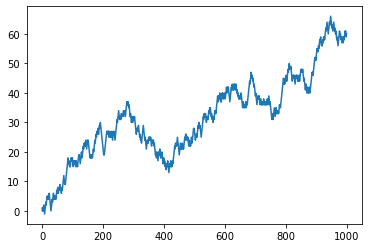

In [24]:
from random import seed
from random import random
from matplotlib import pyplot

random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

* plot NON stationary series generated above

* generate stationary time-series

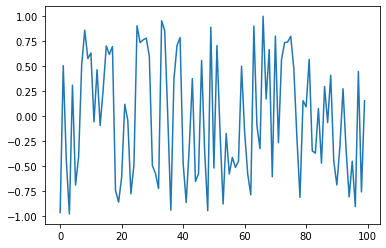

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n=100
x=np.arange(n)
y_=np.random.uniform(-1,1,[n])

mu=0
sigma=0.01
e= np.random.normal(mu, sigma, n)
#stationary series
y=y_+e

plt.plot(x,y)
plt.show()

* plot stationary series generated above

In [6]:
import pandas as pd

* Create function 'ADF_Stationarity_Test' with input parameters `timeseries` and `significance_level` which: 
    * prints adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [4]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

* Apply function 'ADF_Stationarity_Test' to find out whether timeseries generated above are stationary.

In [7]:
adf_test(random_walk)

Results of Dickey-Fuller Test:
Test Statistic                  -0.278714
p-value                          0.928465
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [8]:
adf_test(y)

Results of Dickey-Fuller Test:
Test Statistic                -8.684524e+00
p-value                        4.198289e-14
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


* Apply suitable transformation to make NON stationary time series stationary

In [23]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [25]:
diff = difference(random_walk)

* plot transformed time series

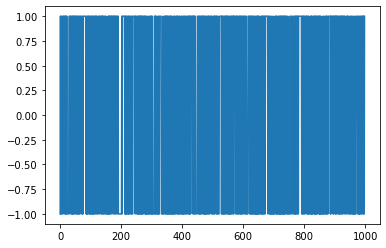

In [26]:
plt.plot(diff)
plt.show()

* Apply function 'ADF_Stationarity_Test' to find out whether transformed timeseries is stationary.

In [27]:
adf_test(diff)

Results of Dickey-Fuller Test:
Test Statistic                 -33.107919
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    998.000000
Critical Value (1%)             -3.436919
Critical Value (5%)             -2.864440
Critical Value (10%)            -2.568314
dtype: float64
